In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('movie_genre_classification_final.csv')

In [3]:
df.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [5]:
df.shape

(50000, 17)

In [6]:
df.columns

Index(['Title', 'Year', 'Director', 'Duration', 'Rating', 'Votes',
       'Description', 'Language', 'Country', 'Budget_USD', 'BoxOffice_USD',
       'Genre', 'Production_Company', 'Content_Rating', 'Lead_Actor',
       'Num_Awards', 'Critic_Reviews'],
      dtype='object')

In [7]:
df.tail()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
49995,Ocean Call 20,2013,T. Johnson,149,6.8,340904,A touching love story with heartwarming moments.,English,UK,62456512,3291117,Romance,Yash Raj Films,PG-13,Leonardo DiCaprio,18,481
49996,Ocean Call 13,2001,M. Brown,166,7.6,214228,A spine-chilling tale that evokes fear and dread.,Japanese,South Korea,33239921,465759764,Horror,Netflix,PG-13,Emma Watson,3,84
49997,Last Mission 15,2017,J. Smith,158,9.2,251931,A light-hearted comedy that guarantees laughter.,Korean,South Korea,79589169,820566917,Comedy,Paramount Pictures,PG-13,Shah Rukh Khan,1,994
49998,Firestorm 11,1992,J. Smith,166,7.2,487956,A spine-chilling tale that evokes fear and dread.,Mandarin,South Korea,179834680,131779818,Horror,Amazon Studios,R,Kangana Ranaut,10,349
49999,Silent Echo 12,2009,P. Adams,117,4.3,392762,An imaginative world filled with magic and won...,Spanish,France,45434366,957562425,Fantasy,Sony Pictures,PG-13,Emma Watson,20,191


In [8]:
print(df.isna().sum())
print(df.duplicated().sum())

Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64
0


In [9]:
# Categorical unique counts
for col in df.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(), '\n')

# Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# Genre Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index,palette="plasma")
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms
# Create the grid of histograms
axes = df.select_dtypes(include=np.number).hist(bins=30, figsize=(18, 12), edgecolor='black')

# Add color to each subplot
colors = plt.cm.Set3(np.linspace(0, 1, len(axes.flatten())))  # Choose a colormap

for ax, color in zip(axes.flatten(), colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()
# Boxplots by Genre
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Genre', y=col,palette="Set2")
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

# Language vs Genre Heatmap
lang_genre = pd.crosstab(df['Language'], df['Genre'])
plt.figure(figsize=(15, 8))
sns.heatmap(lang_genre, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Language vs Genre")
plt.show()

# Interactive Scatter
fig = px.scatter(df, x='Budget_USD', y='BoxOffice_USD', color='Genre', hover_data=['Title', 'Director'])
fig.update_layout(title='Budget vs Box Office by Genre')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# Fill missing values in 'Num_Awards' and 'Critic_Reviews' with the median
df['Num_Awards'].fillna(df['Num_Awards'].median(), inplace=True)
df['Critic_Reviews'].fillna(df['Critic_Reviews'].median(), inplace=True)

# Verify that missing values have been filled
print(df.isna().sum())

Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64


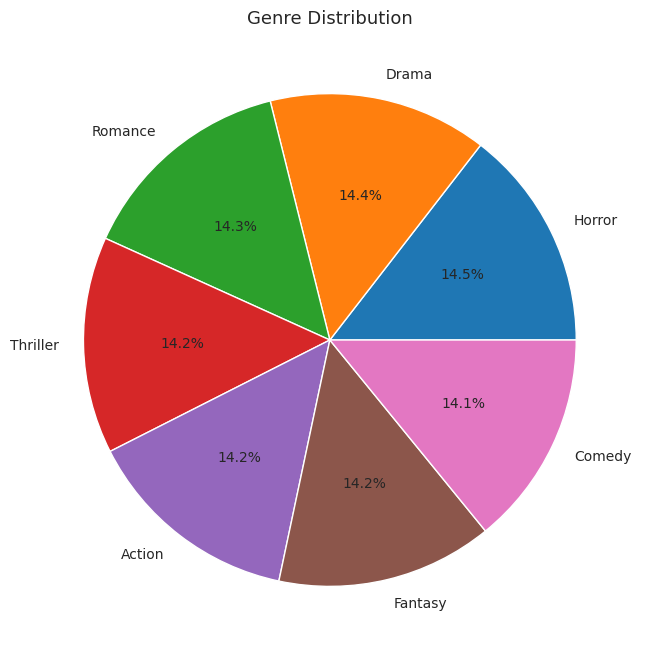

In [12]:
df["Genre"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(12, 8))
plt.title("Genre Distribution",size=13)
plt.ylabel("")  # Optional: hide y-axis label
plt.show()

<Axes: xlabel='Votes', ylabel='Title'>

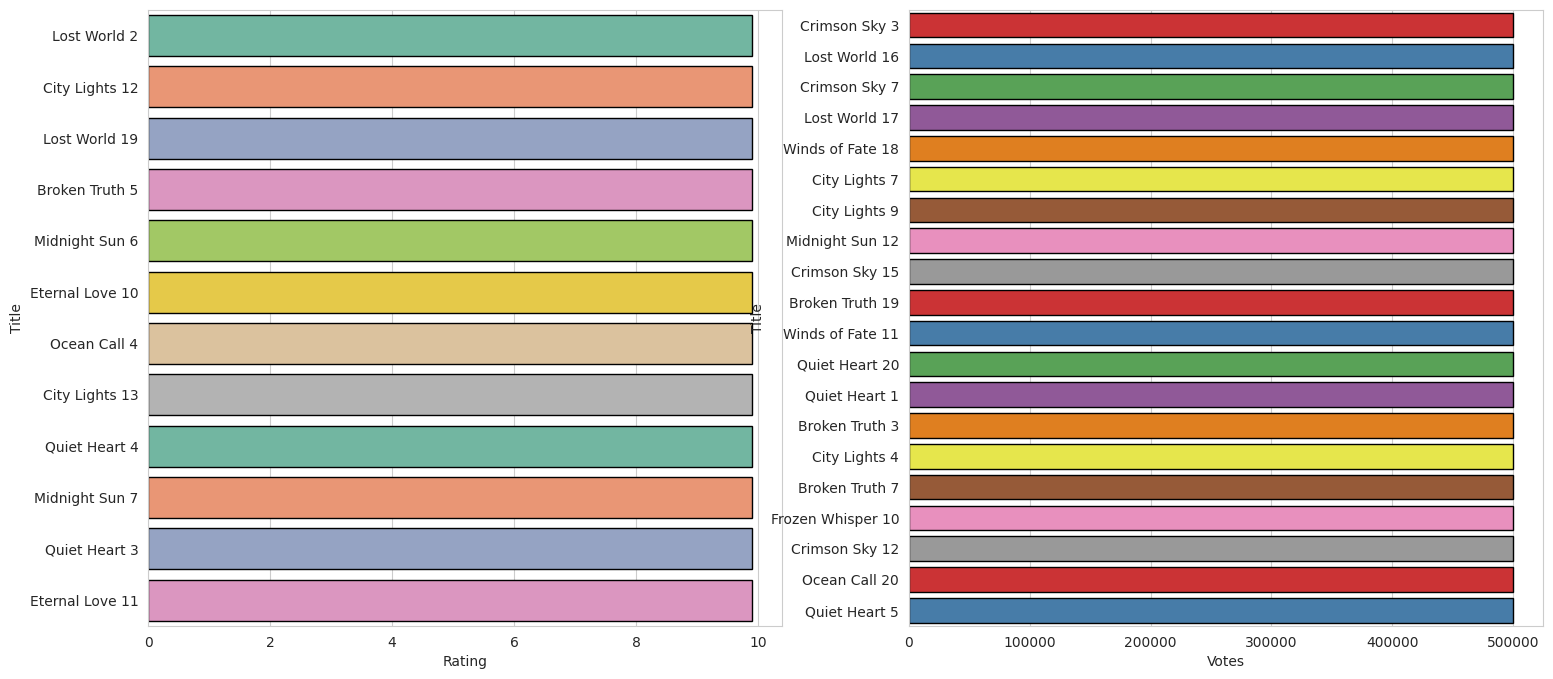

In [13]:
classifi_r = df.groupby(["Title", "Rating", "Votes"]).size().reset_index(name="Count")
classifi_rating = classifi_r.sort_values("Rating",ascending=False).head(20)
classifi_votes=classifi_r.sort_values("Votes",ascending=False).head(20)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(data=classifi_rating,x="Rating",y="Title",edgecolor="black",palette="Set2")

plt.subplot(1,2,2)
sns.barplot(data=classifi_votes,x="Votes",y="Title",edgecolor="black",palette="Set1")

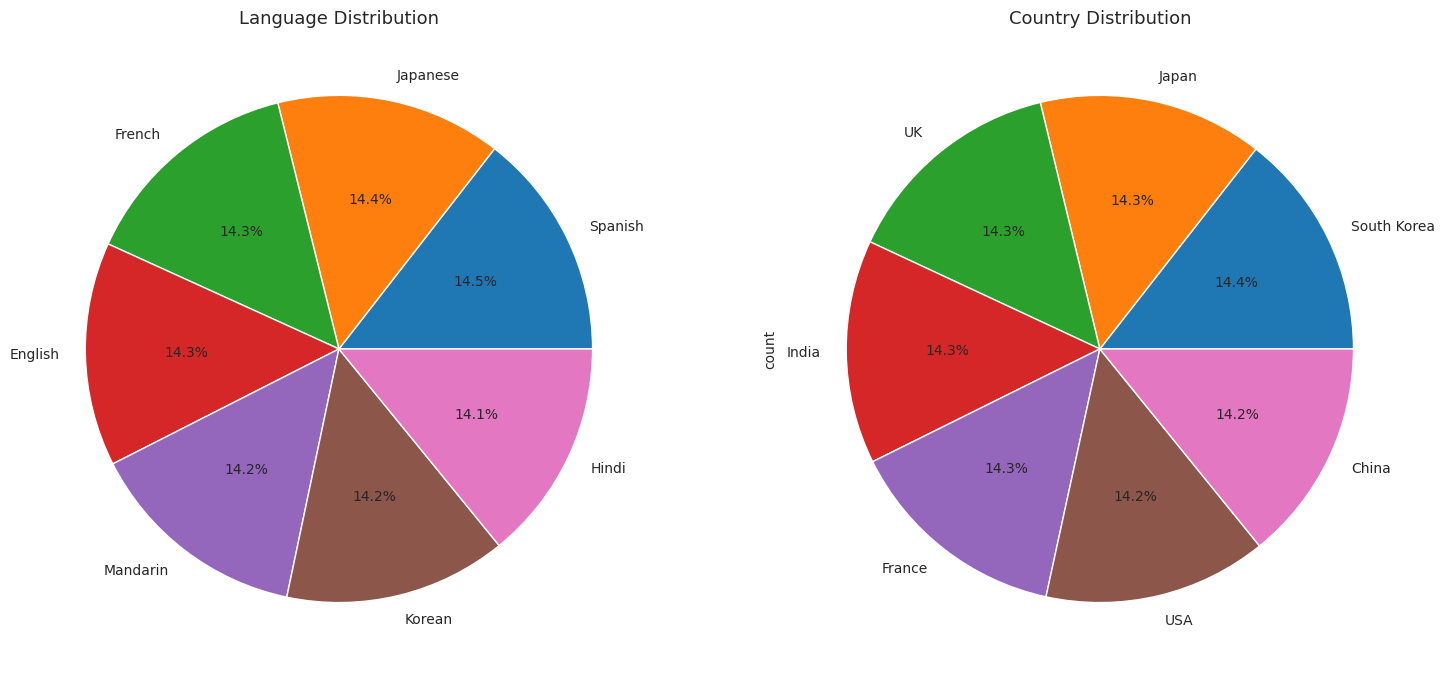

In [14]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
df["Language"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Language Distribution",size=13)
plt.ylabel("")  # Optional: hide y-axis label
plt.subplot(1,2,2)
df["Country"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Country Distribution",size=13)
plt.show()

In [15]:
classifi_usd=df.groupby(["Title","Genre"])["BoxOffice_USD"].sum().sort_values(ascending=False).reset_index().head(25)
classifi_usdd=classifi_usd
classifi_usdd.style.background_gradient(cmap="Blues")

,Title,Genre,BoxOffice_USD
0,Silent Echo 6,Drama,24939168515
1,Eternal Love 3,Fantasy,24393129481
2,City Lights 2,Fantasy,23811351438
3,Broken Truth 2,Horror,23347802352
4,Ocean Call 1,Horror,23158570897
5,Lost World 19,Thriller,23155134217
6,Broken Truth 11,Action,23149691857
7,Ocean Call 10,Thriller,23133397955
8,Broken Truth 20,Romance,22920923007
9,Broken Truth 6,Fantasy,22717786962


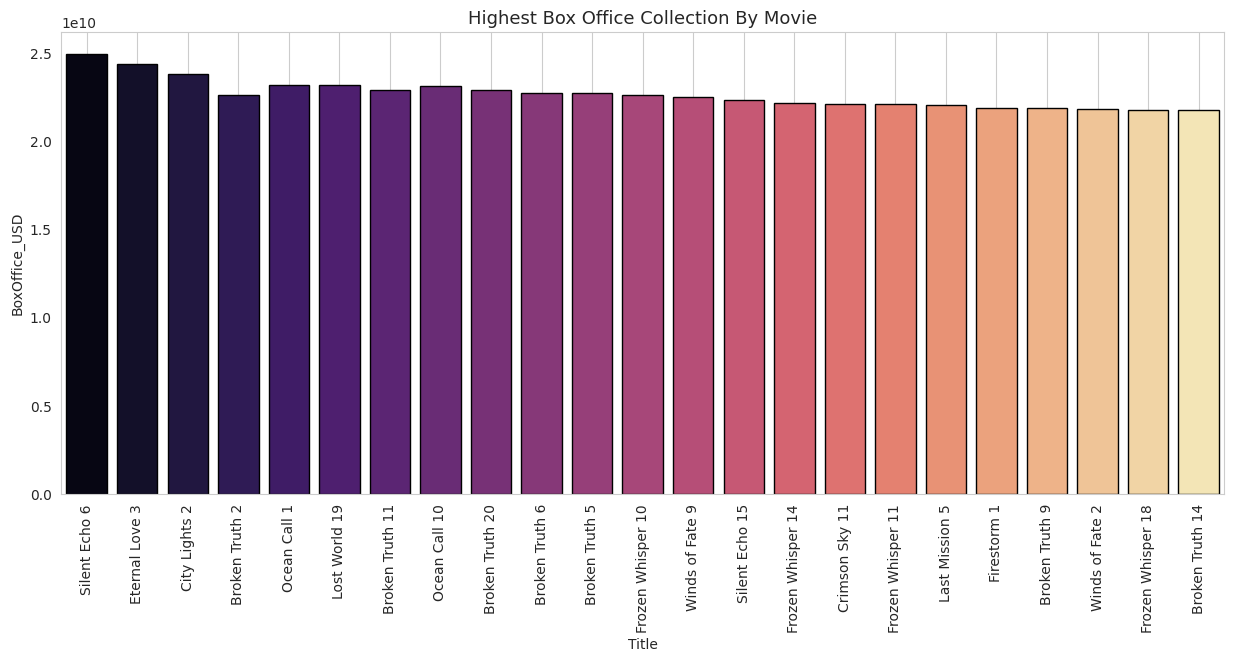

In [16]:
classifi_usd=df.groupby(["Title","Genre"])["BoxOffice_USD"].sum().sort_values(ascending=False).reset_index().head(25)
plt.figure(figsize=(15,6))
sns.barplot(data=classifi_usdd,x="Title",y="BoxOffice_USD",edgecolor="black",palette="magma",ci=None)
plt.xticks(rotation=90)
plt.title("Highest Box Office Collection By Movie",size=13)
plt.grid()
plt.show()

In [17]:
classifi_aw=df.groupby("Title")["Num_Awards"].sum().sort_values(ascending=False).reset_index().head(25)
classifi_awards=classifi_aw.style.background_gradient(cmap="Greens")
classifi_awards

,Title,Num_Awards
0,Ocean Call 1,2393
1,Winds of Fate 19,2371
2,Winds of Fate 6,2356
3,Crimson Sky 3,2310
4,Broken Truth 5,2299
5,Silent Echo 15,2256
6,Silent Echo 16,2251
7,Crimson Sky 18,2249
8,Broken Truth 11,2248
9,Eternal Love 3,2237


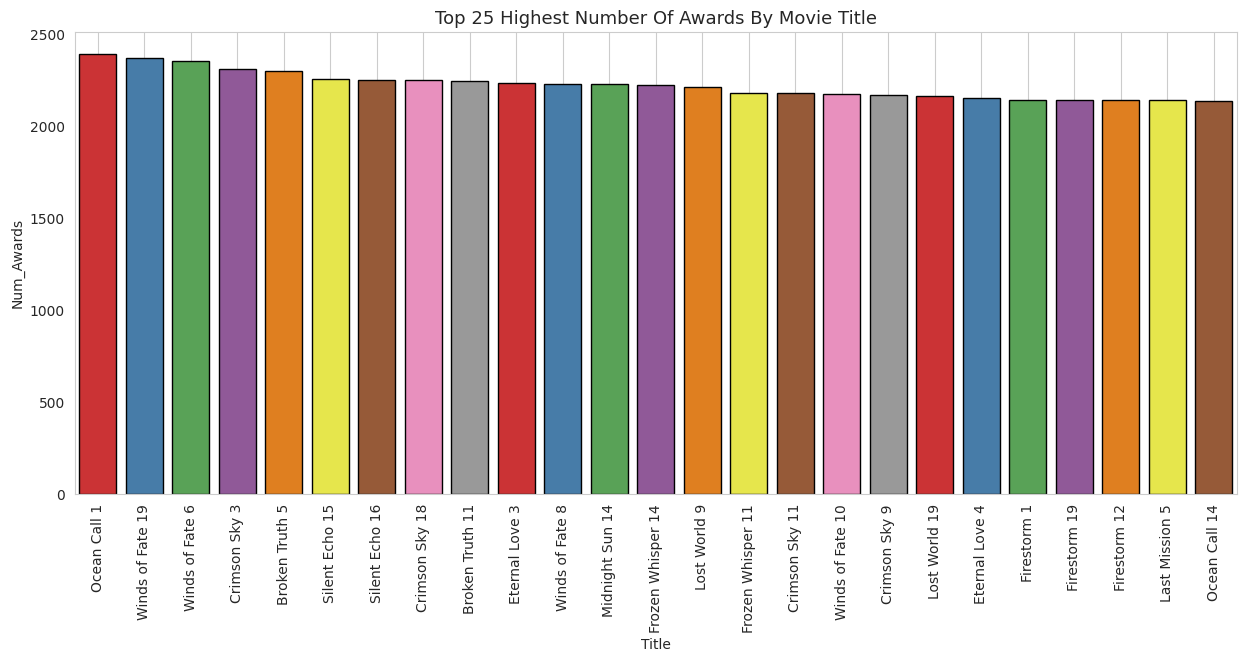

In [18]:
classifi_aw=df.groupby("Title")["Num_Awards"].sum().sort_values(ascending=False).reset_index().head(25)
classifi_aw
plt.figure(figsize=(15,6))
sns.barplot(data=classifi_aw,x="Title",y="Num_Awards",edgecolor="black",palette="Set1",ci=None)
plt.xticks(rotation=90)
plt.title("Top 25 Highest Number Of Awards By Movie Title",size=13)
plt.grid()
plt.show()

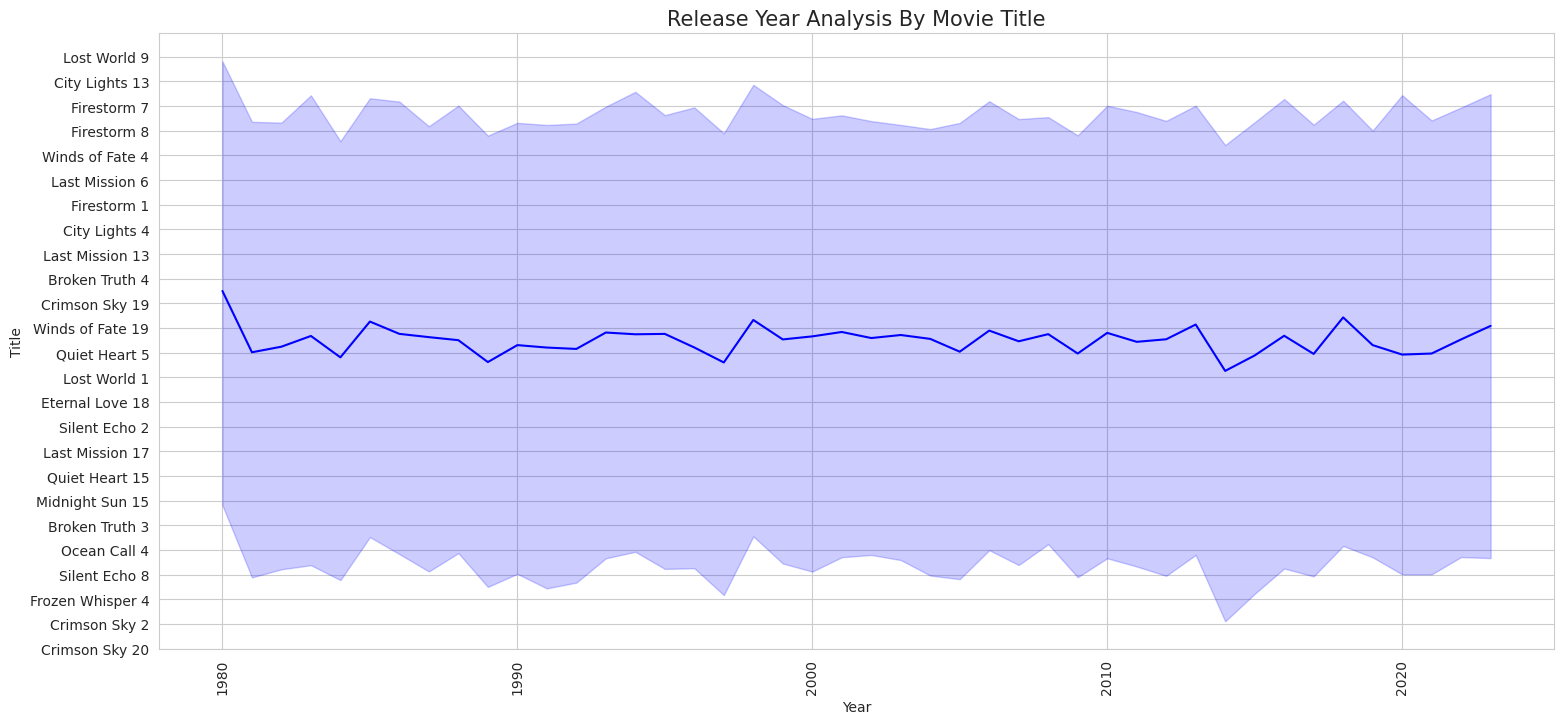

In [19]:
classifi_y=df.groupby(["Title","Year"]).sum().sort_values("Year",ascending=True).reset_index()
classifi_year=classifi_y[["Title","Year"]]
plt.figure(figsize=(18,8))
sns.lineplot(data=classifi_year,x="Year",y="Title",color="blue")
plt.xticks(rotation=90)
plt.title("Release Year Analysis By Movie Title",size=15)
plt.show()

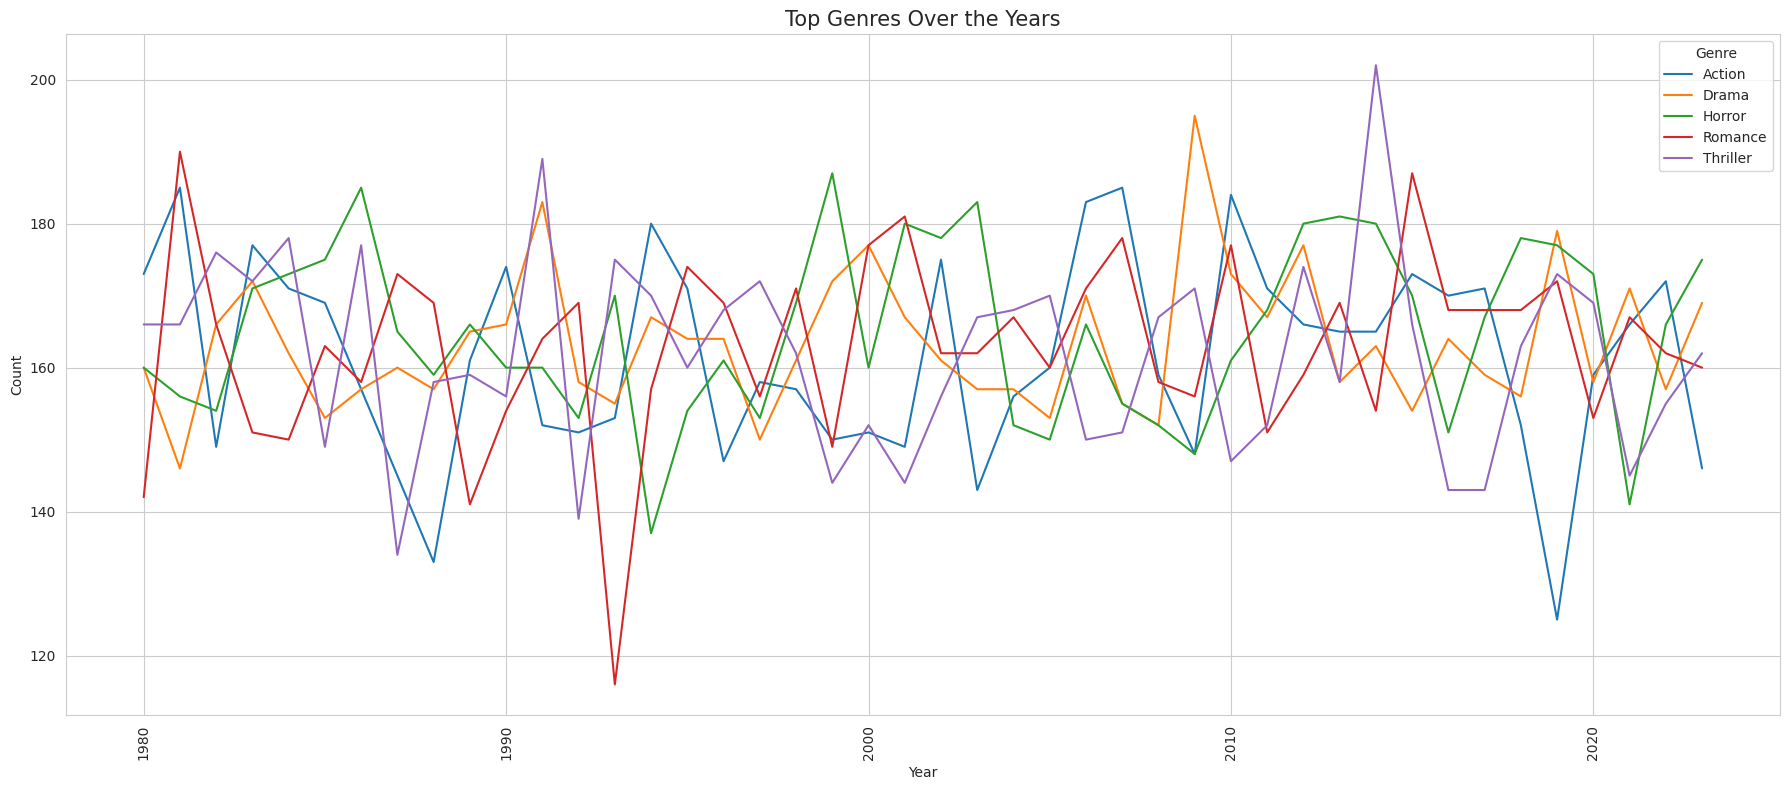

In [20]:
top_genres = df['Genre'].value_counts().nlargest(5).index  # or 7/10

genre_counts = df[df['Genre'].isin(top_genres)].groupby(["Year", "Genre"]).size().reset_index(name="Count")

plt.figure(figsize=(18, 8))
sns.lineplot(data=genre_counts, x="Year", y="Count", hue="Genre", palette="tab10")
plt.title("Top Genres Over the Years",size=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **EDA end**